In [1]:
import pandas as pd
df=pd.read_csv("titles.csv")
df

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008
...,...,...
244909,Black Butterfly in a Colorful World,2018
244910,Hua fei hua wu chun man cheng,1980
244911,Nippon dabi katsukyu,1970
244912,Under Siege 2: Dark Territory,1995


In [2]:
import pandas as pd
df=pd.read_csv("cast.csv")
df

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
3786171,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3786172,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3786173,Skammdegi,1985,Dalla ??r?ard?ttir,actress,Hj?krunarkona,9.0
3786174,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


# Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film blatory have been Superman years?

In [3]:
import pandas as pd
characters = pd.read_csv('cast.csv')
superman_batman_roles = characters[characters['character'].isin(['Superman', 'Batman'])]
yearly_counts = superman_batman_roles.groupby(['year', 'character']).size().unstack(fill_value=0)
superman_years = yearly_counts[yearly_counts['Superman'] > yearly_counts['Batman']]
num_superman_years = len(superman_years)

print(f"Number of 'Superman years' in film history: {num_superman_years}")


Number of 'Superman years' in film history: 11


# How many years have been "Batman years", with more Batman characters than Superman characters?

In [5]:
import pandas as pd
characters = pd.read_csv('cast.csv')
superman_batman_roles = characters[characters['character'].isin(['Superman', 'Batman'])]
yearly_counts = superman_batman_roles.groupby(['year', 'character']).size().unstack(fill_value=0)
batman_years = yearly_counts[yearly_counts['Batman'] > yearly_counts['Superman']]
num_batman_years = len(batman_years)

print(f"Number of 'Batman years' in film history: {num_batman_years}")



Number of 'Batman years' in film history: 27


# Plot the number of actor roles each year and the number of actress roles each year over the history of film

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
characters = pd.read_csv('cast.csv')
actor_actress_roles = characters[characters['type'].isin(['Male', 'Female'])]
roles_per_year = actor_actress_roles.groupby(['year', 'character']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
roles_per_year.plot(kind='line', color=['blue', 'red'])
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year in Film History')
plt.grid(True)
plt.legend(['Actor', 'Actress'])
plt.tight_layout()
plt.show()


TypeError: no numeric data to plot

<Figure size 1200x600 with 0 Axes>

# To plot the number of actor roles and actress roles each year as an area plot using Python with pandas and matplotlib, you can modify the previous code slightly. Here's a Python code template for this task:


In [8]:

import pandas as pd
import matplotlib.pyplot as plt
characters = pd.read_csv('cast.csv')
actor_actress_roles = characters[characters['type'].isin(['Male', 'Female'])]
roles_per_year = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
roles_per_year.plot(kind='area', color=['blue', 'red'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year in Film History (Area Plot)')
plt.grid(True)
plt.legend(['Actor', 'Actress'])
plt.tight_layout()
plt.show()


TypeError: no numeric data to plot

<Figure size 1200x600 with 0 Axes>

# Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
characters = pd.read_csv('cast.csv')
actor_actress_roles = characters[characters['type'].isin(['Male', 'Female'])]
roles_per_year = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)
role_difference = roles_per_year['character'] - roles_per_year['character']
plt.figure(figsize=(12, 6))
role_difference.plot(kind='line', color='purple')
plt.xlabel('Year')
plt.ylabel('Difference (Actor Roles - Actress Roles)')
plt.title('Difference Between Actor and Actress Roles Each Year in Film History')
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'character'

# Plot the fraction of roles that have been 'actor' roles each year in the history of film.

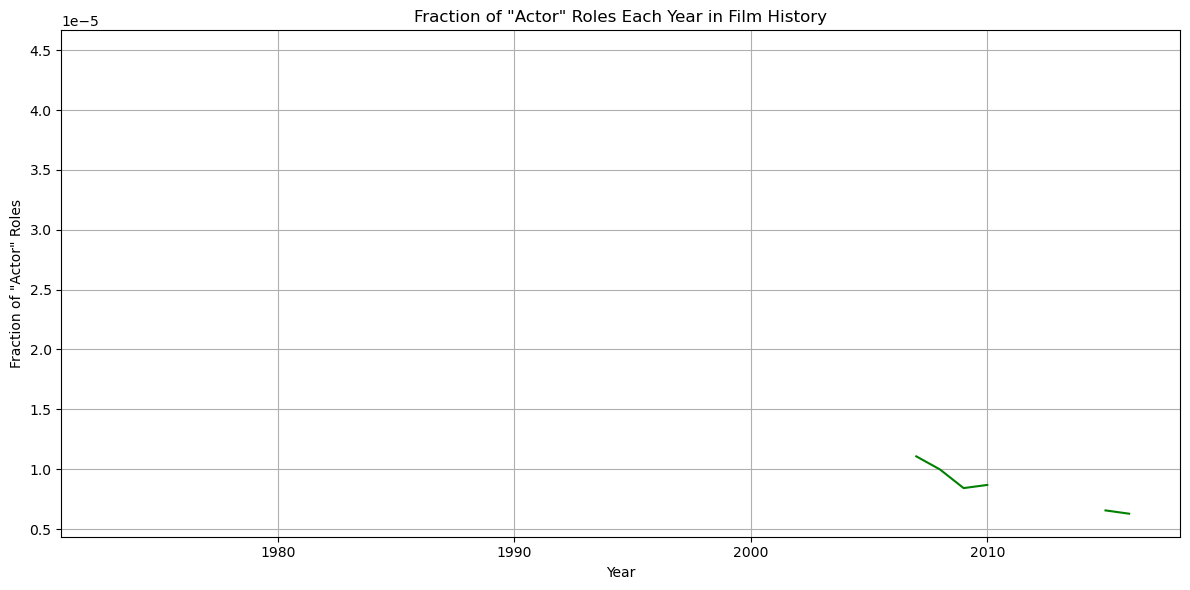

In [15]:
characters = pd.read_csv('cast.csv')
total_roles_per_year = characters.groupby('year').size()
actor_roles_per_year = characters[characters['character'] == 'Male'].groupby('year').size()
fraction_actor_roles = actor_roles_per_year / total_roles_per_year
plt.figure(figsize=(12, 6))
fraction_actor_roles.plot(kind='line', color='green')
plt.xlabel('Year')
plt.ylabel('Fraction of "Actor" Roles')
plt.title('Fraction of "Actor" Roles Each Year in Film History')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

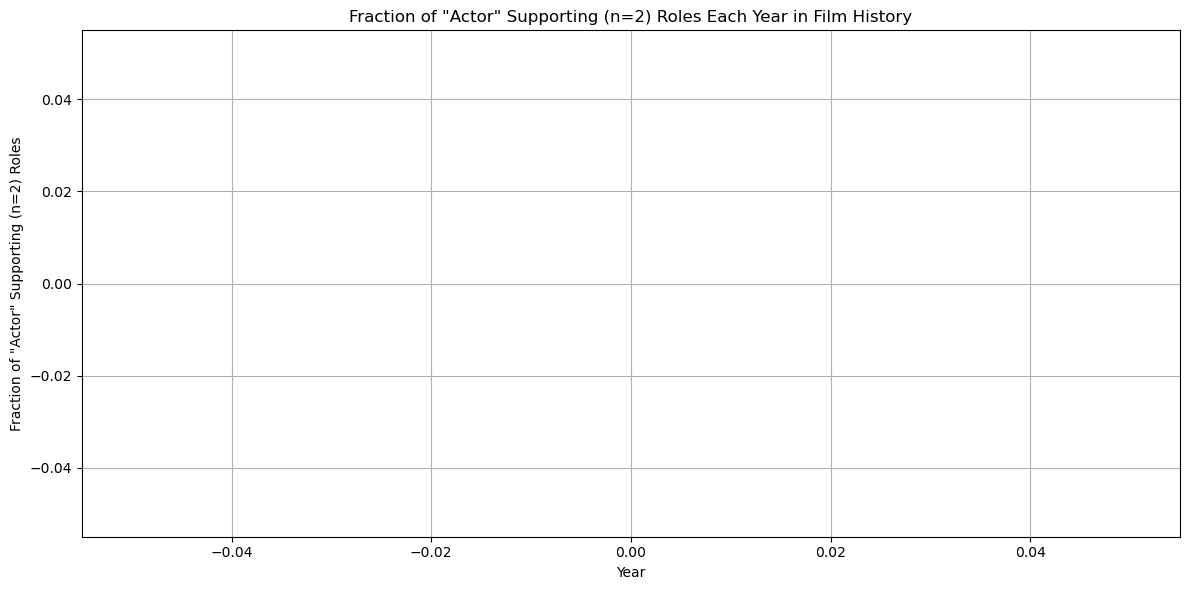

In [14]:
characters = pd.read_csv('cast.csv')

# Filter the dataset to include only supporting (n=2) roles
supporting_roles = characters[characters['type'] == 'Supporting (n=2)']

# Group the data by year and count the total number of supporting (n=2) roles in each year
total_supporting_roles_per_year = supporting_roles.groupby('year').size()

# Group the data by year and count the number of 'actor' supporting (n=2) roles in each year
actor_supporting_roles_per_year = supporting_roles[supporting_roles['character'] == 'Male'].groupby('year').size()

# Calculate the fraction of 'actor' supporting (n=2) roles each year
fraction_actor_supporting_roles = actor_supporting_roles_per_year / total_supporting_roles_per_year

# Create a line plot for the fraction of 'actor' supporting (n=2) roles
plt.figure(figsize=(12, 6))
fraction_actor_supporting_roles.plot(kind='line', color='purple')
plt.xlabel('Year')
plt.ylabel('Fraction of "Actor" Supporting (n=2) Roles')
plt.title('Fraction of "Actor" Supporting (n=2) Roles Each Year in Film History')
plt.grid(True)
plt.tight_layout()
plt.show()

# Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

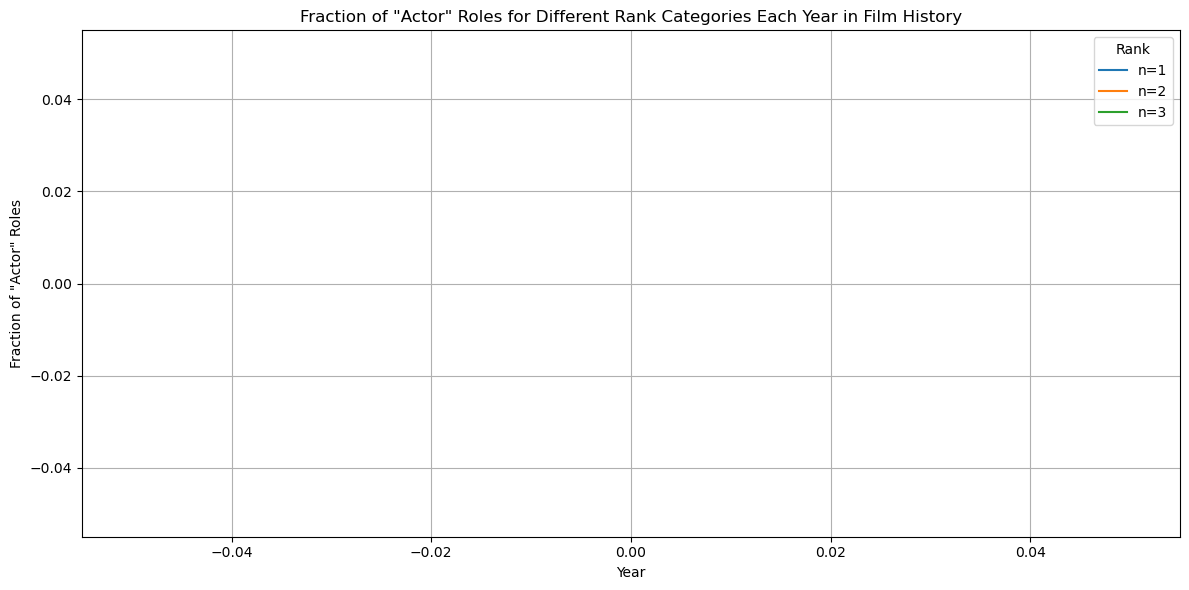

In [17]:
characters = pd.read_csv('cast.csv')

# Filter the dataset to include only supporting roles (n=1 through n=3)
supporting_roles = characters[characters['type'].str.contains('Supporting', case=False)]

# Define a list of ranks (n=1 through n=3)
ranks = ['n=1', 'n=2', 'n=3']

# Create a figure and axis for the plot
plt.figure(figsize=(12, 6))

# Iterate over each rank and plot the fraction of 'actor' roles each year
for rank in ranks:
    rank_roles = supporting_roles[supporting_roles['type'].str.contains(rank, case=False)]
    total_rank_roles_per_year = rank_roles.groupby('year').size()
    actor_rank_roles_per_year = rank_roles[rank_roles['character'] == 'Male'].groupby('year').size()
    fraction_actor_rank_roles = actor_rank_roles_per_year / total_rank_roles_per_year
    fraction_actor_rank_roles.plot(kind='line', label=rank)

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Fraction of "Actor" Roles')
plt.title('Fraction of "Actor" Roles for Different Rank Categories Each Year in Film History')
plt.grid(True)
plt.legend(title='Rank')
plt.tight_layout()

# Show the plot
plt.show()